In [109]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

we have imported the required libraries and modules for the image classification using CNN
**NOW LETS RESCALE THE IMAGES AND SET THE TARGET_SIZE TO (150,150)**

In [44]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1./255)

train_dataset = train.flow_from_directory("/kaggle/input/drivess/train",
                                          target_size=(150,150),
                                          batch_size = 16,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/kaggle/input/drivess/test",
                                          target_size=(150,150),
                                          batch_size =16,
                                          class_mode = 'binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


we can check the class indices as follows

In [110]:
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

NOW LETS SPLIT THE TRAIN_DATASET INTO 2 PARTS IN 80:20 RATIO (train_generator,valid_generator)

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80:20 split
)

# Create a training data generator
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/drivess/train',
    target_size=(150,150),
    batch_size=16,
    class_mode='binary',
    subset='training'  # specify this is the training set
)

# Create a validation data generator
validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/drivess/train',
    target_size=(150,150),
    batch_size=16,
    class_mode='binary',
    subset='validation'  # specify this is the validation set
)

Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


INITIALLY THE TRAIN_DATASET CONTAINS 557 IMAGES , NOW WE HAVE DIVIDED TRAIN_DATASET INTO 2 TRAIN_GENERATOR(447 IMAGES)AND VALIDATION_GENERATOR (110 IMAGES)

**Lets define the model using CNN  by using 4 maxpool layers **

In [46]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

**BEFORE RUNNING TO GET THE ACCURACY OF MODEL , WE MUST COMPILE THEM . LETS COMPILE THEM AS FOLLOWS**

In [63]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

Now lets check the history of the model. We can ignore the warning

In [79]:
history=model.fit_generator(train_generator,
         steps_per_epoch = 27,
         epochs = 15,
         validation_data = validation_generator
       
         )

/tmp/ipykernel_42/1715095572.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,


Epoch 1/15
27/27 [==============================] - 10s 370ms/step - loss: 0.1032 - accuracy: 0.9629 - val_loss: 1.6361 - val_accuracy: 0.7545
Epoch 2/15
27/27 [==============================] - 10s 380ms/step - loss: 0.0817 - accuracy: 0.9814 - val_loss: 1.7044 - val_accuracy: 0.7182
Epoch 3/15
27/27 [==============================] - 11s 388ms/step - loss: 0.0859 - accuracy: 0.9768 - val_loss: 1.5999 - val_accuracy: 0.7091
Epoch 4/15
27/27 [==============================] - 10s 375ms/step - loss: 0.0850 - accuracy: 0.9814 - val_loss: 1.6679 - val_accuracy: 0.7091
Epoch 5/15
27/27 [==============================] - 10s 372ms/step - loss: 0.0788 - accuracy: 0.9791 - val_loss: 1.4318 - val_accuracy: 0.7091
Epoch 6/15
27/27 [==============================] - 10s 381ms/step - loss: 0.0742 - accuracy: 0.9814 - val_loss: 1.5302 - val_accuracy: 0.6727
Epoch 7/15
27/27 [==============================] - 10s 374ms/step - loss: 0.1086 - accuracy: 0.9652 - val_loss: 1.7638 - val_accuracy: 0.6727

AS WE CAN OBSERVE THE ACCURACY IS :0.995 (which is greater than 0.95) AND THE VALIDATION_ACCURACY IS:0.72.
NOW LETS PLOT GRAPH FOR LOSS AND ACCURACY :

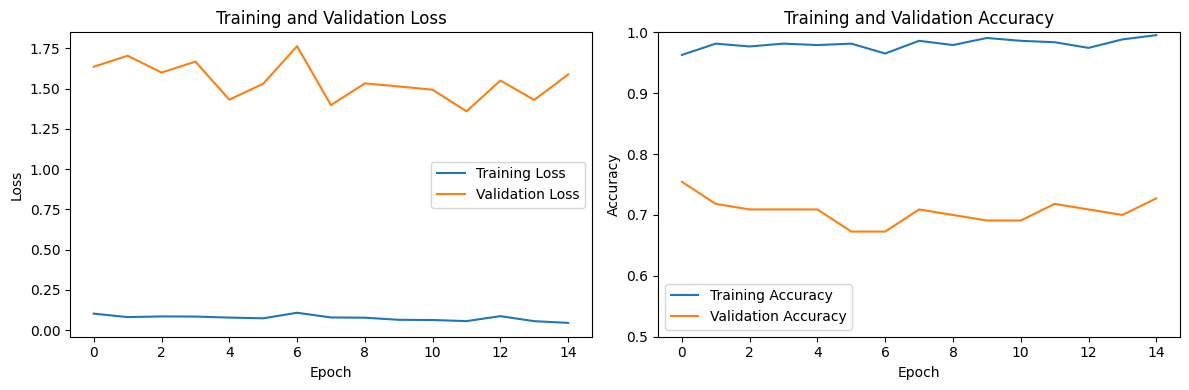

In [84]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined the 'history' variable

history_df = pd.DataFrame(history.history)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # Adjust the size as needed

# Plot loss in the first subplot
axes[0].plot(history_df['loss'], label='Training Loss')
axes[0].plot(history_df['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[0].legend()
# Plot accuracy in the second subplot
axes[1].plot(history_df['accuracy'], label='Training Accuracy')
axes[1].plot(history_df['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0.5, 1)
axes[1].legend()
# Adjust the space between subplots
plt.tight_layout()

plt.show()


**Now lets calculate accuracy_score and f1_score **

In [108]:

test_dataset = test.flow_from_directory("/kaggle/input/drivess/test",
                                          target_size=(150,150),
                                          batch_size =16,
                                          class_mode = 'binary',
                                          color_mode='rgb',  # Assuming your model was trained on RGB images
                                          shuffle=False,  # Important to keep the order of predictions consistent with true labels
                                        )
predictions=model.predict(test_dataset)
predicted_labels = (predictions > 0.38).astype(int).flatten()
true_labels = test_dataset.classes
accuracy = accuracy_score(true_labels, predicted_labels)
f1=f1_score(true_labels,predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'f1_score: {f1 * 100:.2f}%')

Found 140 images belonging to 2 classes.
9/9 [==============================] - 1s 125ms/step
Accuracy: 70.00%
f1_score: 69.57%


**THE overall accuracy_score we got is 70% and f1_score is 69.12%**

**Now lets predict some of the test data using pictures**

In [102]:

def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("DOG",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("CAT",fontsize=30)

1/1 [==============================] - 0s 31ms/step
[[1.]]


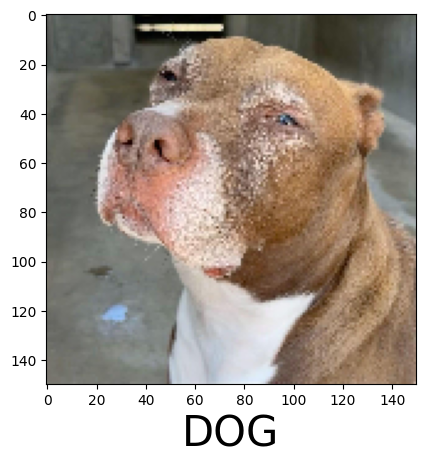

In [103]:
predictImage('/kaggle/input/drivess/test/dogs/dog_229.jpg')

1/1 [==============================] - 0s 28ms/step
[[1.]]


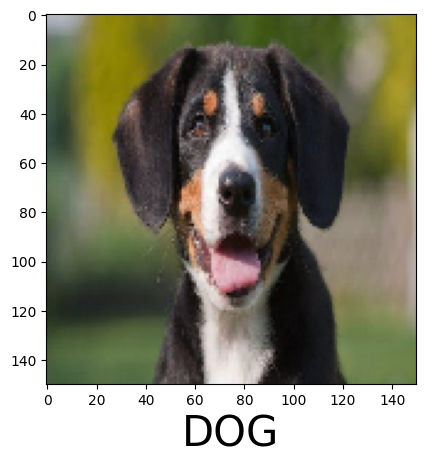

In [96]:
predictImage('/kaggle/input/drivess/test/dogs/dog_283.jpg')

1/1 [==============================] - 0s 24ms/step
[[0.]]


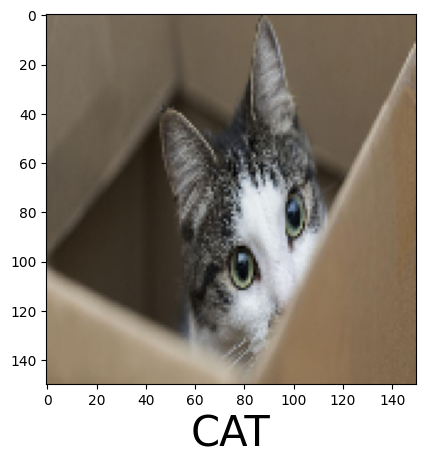

In [107]:
predictImage('/kaggle/input/drivess/test/cats/cat_251.jpg')

***hence we successfully created a model that classifies images.** *